# ANA 680 
# HW3_ Fairbairn
# Random Forest Regressor

## Wine quality prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection

from pprint import pprint

import pickle

iRandomState = 7
accuracy_1 = 1.00
accuracy_2 = 1.00
accuracy_3 = 1.00
accuracy_4 = 1.00

### Load file 

In [2]:
file_path= "C:\David\ANA 680 Machine Learning Deployment\Data\WineQuality"
file_path = file_path.replace("\\","/")
file = file_path + "/winequality-combined.csv"
df=pd.read_csv(file, na_values=['NULL', '?', 'NONE'])

### print descriptive stats

In [3]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [4]:
df.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.22,1.30,3.80,6.40,7.00,7.70,15.90
volatile acidity,6497.0,0.34,0.16,0.08,0.23,0.29,0.40,1.58
citric acid,6497.0,0.32,0.15,0.00,0.25,0.31,0.39,1.66
residual sugar,6497.0,5.44,4.76,0.60,1.80,3.00,8.10,65.80
chlorides,6497.0,0.06,0.04,0.01,0.04,0.05,0.06,0.61
free sulfur dioxide,6497.0,30.53,17.75,1.00,17.00,29.00,41.00,289.00
total sulfur dioxide,6497.0,115.74,56.52,6.00,77.00,118.00,156.00,440.00
density,6497.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,6497.0,3.22,0.16,2.72,3.11,3.21,3.32,4.01
sulphates,6497.0,0.53,0.15,0.22,0.43,0.51,0.60,2.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [6]:
print(df.isnull().sum().sort_values(ascending=False).to_string())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0


### Histograms of factors

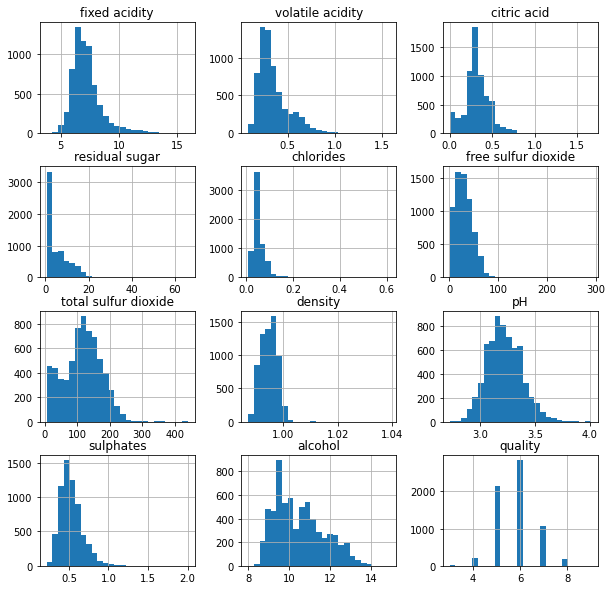

In [7]:
df.hist(bins=25,figsize=(10,10))
plt.show()

### Distribution of quality (Target)

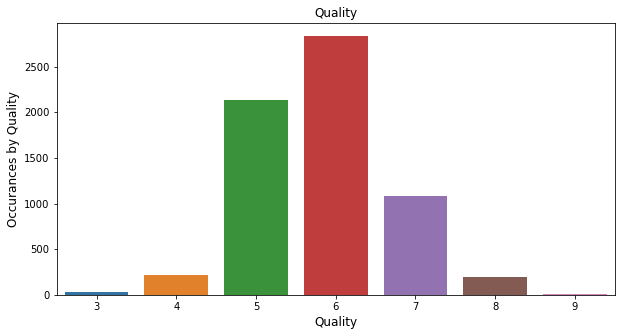

In [8]:
op_count = df['quality'].value_counts()
plt.figure(figsize=(10,5))
sb.barplot(x=op_count.index,y= op_count.values)
plt.title('Quality')
plt.ylabel('Occurances by Quality', fontsize=12)
plt.xlabel('Quality', fontsize=12)
plt.show()

### Heatmap of factor correlation

<AxesSubplot:>

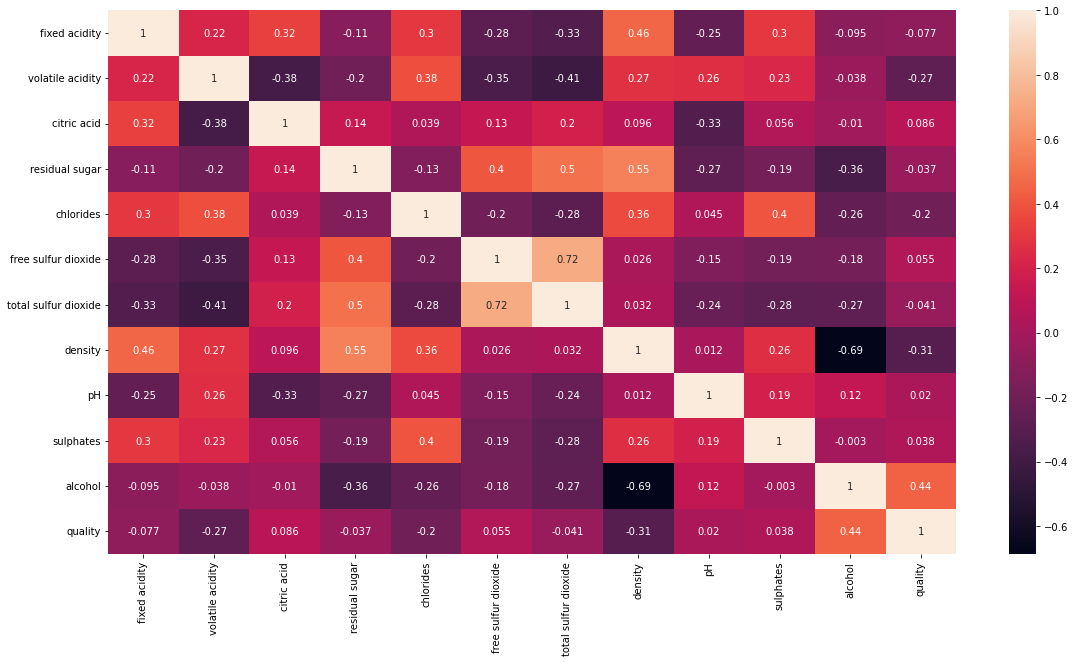

In [9]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='white')
sb.heatmap(df.corr(),annot=True)

### find correlations above 0.7

In [10]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

total sulfur dioxide


In [11]:
new_df=df.drop('total sulfur dioxide',axis=1)

## Create x and y dataframes

In [12]:
x = new_df.drop(columns=['quality'])

In [13]:
# use only the target values for Y
y=new_df[['quality']].values

## Split into training and testing datasets

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train_unraveled, y_test = train_test_split(x,y,test_size=0.2,random_state=iRandomState)
y_train = y_train_unraveled.ravel()

## Normalize the dataset

In [15]:
"""
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
X_train = norm_fit.transform(X_train)
X_test = norm_fit.transform(X_test)
"""

'\n#importing module\nfrom sklearn.preprocessing import MinMaxScaler\n# creating normalization object \nnorm = MinMaxScaler()\n# fit data\nnorm_fit = norm.fit(x_train)\nX_train = norm_fit.transform(X_train)\nX_test = norm_fit.transform(X_test)\n'

## RMSE function

In [16]:
def get_rmse(y_test, predictions):
    return mean_squared_error(y_test, predictions) ** 0.5

## Determine best model hyperparameters

In [17]:
best_rmse = 1.00
best_n_estimators = 450
best_max_depth = 20
best_min_samples_split = 2
best_max_leaf_nodes = 1000
best_min_samples_leaf = 1
best_max_samples = 0.9810000000000001
i = 0

### n_estimators

rmse: 0.60717 best rmse:0.6071694732368956  estimator: 50
RMSE of model with n_estimators=50: 0.60717
rmse: 0.60200 best rmse:0.602000766674697  estimator: 100
RMSE of model with n_estimators=100: 0.60200
rmse: 0.60084 best rmse:0.6008417172856502  estimator: 150
RMSE of model with n_estimators=150: 0.60084
rmse: 0.59856 best rmse:0.5985566132211465  estimator: 200
RMSE of model with n_estimators=200: 0.59856
rmse: 0.59729 best rmse:0.5972863866624684  estimator: 250
RMSE of model with n_estimators=250: 0.59729
RMSE of model with n_estimators=300: 0.59693
RMSE of model with n_estimators=350: 0.59679
RMSE of model with n_estimators=400: 0.59649
rmse: 0.59595 best rmse:0.5959535282111135  estimator: 450
RMSE of model with n_estimators=450: 0.59595
RMSE of model with n_estimators=500: 0.59603


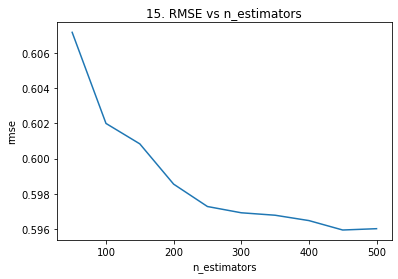

In [18]:
# Creating the 10 models
n_estimators = [50 + i*50 for i in range(10)]
models_n_estimators = [RandomForestRegressor(n_estimators = n_estimators[i], random_state = iRandomState) for i in range(10)]

n_estimators_rmses = []
i = 0
# Fitting the models and making predictions    
for model in models_n_estimators:                   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = get_rmse(y_test, predictions)
    if rmse < best_rmse - 0.001:
        best_rmse = rmse
        best_n_estimators = model.n_estimators
        print (f'rmse: {rmse:.5f} best rmse:{best_rmse}  estimator: {best_n_estimators}')
    n_estimators_rmses += [rmse]
    print(f"RMSE of model with n_estimators={model.n_estimators}: {rmse:.5f}")

# Plotting the RMSEs
plt.plot(n_estimators, n_estimators_rmses)
plt.title("15. RMSE vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("rmse")
plt.show()

### max_depth

rmse: 0.64155 best rmse:0.6415459868284769  estimator: 10
RMSE of model with max_depth=10: 0.64155
rmse: 0.60272 best rmse:0.6027222429446517  estimator: 20
RMSE of model with max_depth=20: 0.60272
RMSE of model with max_depth=30: 0.60182
RMSE of model with max_depth=40: 0.60200
RMSE of model with max_depth=50: 0.60200
RMSE of model with max_depth=60: 0.60200
RMSE of model with max_depth=70: 0.60200
RMSE of model with max_depth=80: 0.60200
RMSE of model with max_depth=90: 0.60200
RMSE of model with max_depth=100: 0.60200


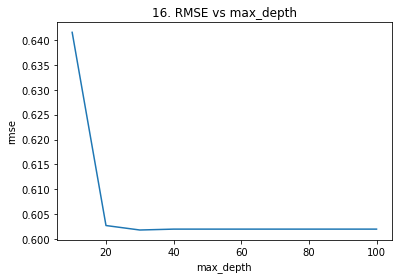

In [19]:
# Creating the 10 models
max_depths = [10 + i*10 for i in range(10)]
models_max_depths = [RandomForestRegressor(max_depth = max_depths[i], random_state = iRandomState) for i in range(10)]

max_depths_rmses = []
best_rmse = 1.00
# Fitting the models and making predictions
for model in models_max_depths:                   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = get_rmse(y_test, predictions)
    if rmse < best_rmse - 0.02:
        best_rmse = rmse
        best_max_depth = (model.max_depth - (i*10 ))
        print (f'rmse: {rmse:.5f} best rmse:{best_rmse}  estimator: {best_max_depth}')
    max_depths_rmses += [rmse]
    print(f"RMSE of model with max_depth={model.max_depth}: {rmse:.5f}")

# Plotting the RMSEs
plt.plot(max_depths, max_depths_rmses)
plt.title("16. RMSE vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("rmse")
plt.show()

### min_samples_split

rmse: 0.60200 best rmse:0.602000766674697  estimator: 2
RMSE of model with min_samples_split=2: 0.60200
RMSE of model with min_samples_split=52: 0.65624
RMSE of model with min_samples_split=102: 0.67770
RMSE of model with min_samples_split=152: 0.69012
RMSE of model with min_samples_split=202: 0.69624
RMSE of model with min_samples_split=252: 0.70180
RMSE of model with min_samples_split=302: 0.70700
RMSE of model with min_samples_split=352: 0.71208
RMSE of model with min_samples_split=402: 0.71714
RMSE of model with min_samples_split=452: 0.72027
RMSE of model with min_samples_split=500: 0.72262
RMSE of model with min_samples_split=1000: 0.74185
RMSE of model with min_samples_split=1500: 0.76083
RMSE of model with min_samples_split=2000: 0.76372
RMSE of model with min_samples_split=2500: 0.78687
RMSE of model with min_samples_split=3000: 0.78738
RMSE of model with min_samples_split=3500: 0.86599
RMSE of model with min_samples_split=4000: 0.86599
RMSE of model with min_samples_split=450

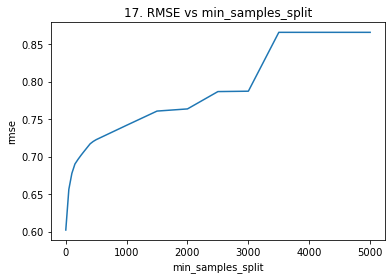

In [20]:
# Creating the 20 models

min_samples_splits = [2 + i*50 for i in range(10)] + [500 + i*500 for i in range(10)]
models_min_samples_splits = [RandomForestRegressor(min_samples_split = min_samples_splits[i], random_state = iRandomState) for i in range(20)]

min_samples_splits_rmses = []
best_rmse = 1.00
# Fitting the models and making predictions
for model in models_min_samples_splits:                   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = get_rmse(y_test, predictions)
    if rmse < best_rmse - 0.025:
        best_rmse = rmse
        best_min_samples_split = (model.min_samples_split -(i*50))
        print (f'rmse: {rmse:.5f} best rmse:{best_rmse}  estimator: {best_min_samples_split}')
    min_samples_splits_rmses += [rmse]
    print(f"RMSE of model with min_samples_split={model.min_samples_split}: {rmse:.5f}")

# Plotting the RMSEs
plt.plot(min_samples_splits, min_samples_splits_rmses)
plt.title("17. RMSE vs min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("rmse")
plt.show()

### max_leaf_nodes

rmse: 0.64532 best rmse:0.6453233248105892  estimator: 200
RMSE of model with max_leaf_nodes=200: 0.64532
rmse: 0.62388 best rmse:0.6238801786489682  estimator: 400
RMSE of model with max_leaf_nodes=400: 0.62388
rmse: 0.61219 best rmse:0.6121867293677727  estimator: 600
RMSE of model with max_leaf_nodes=600: 0.61219
RMSE of model with max_leaf_nodes=800: 0.60518
rmse: 0.59963 best rmse:0.5996345948174149  estimator: 1000
RMSE of model with max_leaf_nodes=1000: 0.59963
RMSE of model with max_leaf_nodes=1200: 0.59903
RMSE of model with max_leaf_nodes=1400: 0.59903
RMSE of model with max_leaf_nodes=1600: 0.59903
RMSE of model with max_leaf_nodes=1800: 0.59903
RMSE of model with max_leaf_nodes=2000: 0.59903


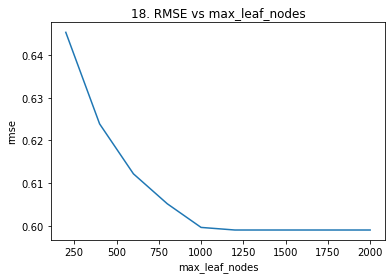

In [21]:
# Creating the 10 models

max_leaf_nodes = [200 + i*200 for i in range(10)]
models_max_leaf_nodes = [RandomForestRegressor(max_leaf_nodes = max_leaf_nodes[i], random_state = iRandomState) for i in range(10)]

max_leaf_nodes_rmses = []
best_rmse = 1.00
# Fitting the models and making predictions
for model in models_max_leaf_nodes:                   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = get_rmse(y_test, predictions)
    if rmse < best_rmse - 0.01:
        best_rmse = rmse
        best_max_leaf_nodes = (model.max_leaf_nodes - (i*200))
        print (f'rmse: {rmse:.5f} best rmse:{best_rmse}  estimator: {best_max_leaf_nodes}')
    max_leaf_nodes_rmses += [rmse]
    print(f"RMSE of model with max_leaf_nodes={model.max_leaf_nodes}: {rmse:.5f}")

# Plotting the RMSEs
plt.plot(max_leaf_nodes, max_leaf_nodes_rmses)
plt.title("18. RMSE vs max_leaf_nodes")
plt.xlabel("max_leaf_nodes")
plt.ylabel("rmse")
plt.show()

### min_samples_leaf

rmse: 0.60200 best rmse:0.602000766674697  estimator: 1
RMSE of model with min_samples_leaf=1: 0.60200
RMSE of model with min_samples_leaf=26: 0.67573
RMSE of model with min_samples_leaf=51: 0.69358
RMSE of model with min_samples_leaf=76: 0.70318
RMSE of model with min_samples_leaf=101: 0.70914
RMSE of model with min_samples_leaf=126: 0.71291
RMSE of model with min_samples_leaf=151: 0.71647
RMSE of model with min_samples_leaf=176: 0.72102
RMSE of model with min_samples_leaf=201: 0.72493
RMSE of model with min_samples_leaf=226: 0.72786
RMSE of model with min_samples_leaf=250: 0.72956
RMSE of model with min_samples_leaf=500: 0.74421
RMSE of model with min_samples_leaf=750: 0.76391
RMSE of model with min_samples_leaf=1000: 0.76772
RMSE of model with min_samples_leaf=1250: 0.78830
RMSE of model with min_samples_leaf=1500: 0.79609
RMSE of model with min_samples_leaf=1750: 0.86599
RMSE of model with min_samples_leaf=2000: 0.86599
RMSE of model with min_samples_leaf=2250: 0.86599
RMSE of mode

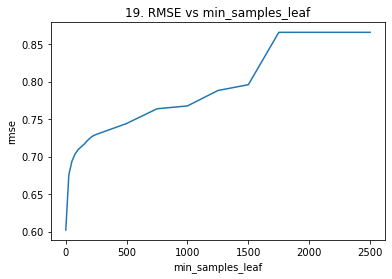

In [22]:
# Creating the 20 models

min_samples_leaves =  [1 + i*25 for i in range (10)] + [250 + i*250 for i in range(10)]
models_min_samples_leaves = [RandomForestRegressor(min_samples_leaf = min_samples_leaves[i], random_state = iRandomState) for i in range(20)]

min_samples_leaves_rmses = []
best_rmse = 1.00
# Fitting the models and making predictions
for model in models_min_samples_leaves:                   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = get_rmse(y_test, predictions)
    if rmse < best_rmse - 0.05:
        best_rmse = rmse
        best_min_samples_leaf = (model.min_samples_leaf - (i*250))
        print (f'rmse: {rmse:.5f} best rmse:{best_rmse}  estimator: {best_min_samples_leaf}')
    min_samples_leaves_rmses += [rmse]
    print(f"RMSE of model with min_samples_leaf={model.min_samples_leaf}: {rmse:.5f}")

# Plotting the RMSEs
plt.plot(min_samples_leaves, min_samples_leaves_rmses)
plt.title("19. RMSE vs min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("rmse")
plt.show()

### Max_Samples

rmse: 0.68531  best rmse:0.6853073426180066   estimator: 0.05
RMSE of model with max_samples=0.05: 0.68531
rmse: 0.67225  best rmse:0.6722458341547842   estimator: 0.099
RMSE of model with max_samples=0.099: 0.67225
rmse: 0.65720  best rmse:0.6572038672108701   estimator: 0.14800000000000002
RMSE of model with max_samples=0.14800000000000002: 0.65720
rmse: 0.64876  best rmse:0.6487648027064733   estimator: 0.197
RMSE of model with max_samples=0.197: 0.64876
rmse: 0.64822  best rmse:0.6482173780690929   estimator: 0.246
RMSE of model with max_samples=0.246: 0.64822
rmse: 0.63314  best rmse:0.6331379725681381   estimator: 0.295
RMSE of model with max_samples=0.295: 0.63314
RMSE of model with max_samples=0.34400000000000003: 0.63626
rmse: 0.62952  best rmse:0.6295163589247273   estimator: 0.393
RMSE of model with max_samples=0.393: 0.62952
rmse: 0.62470  best rmse:0.6247039298739844   estimator: 0.442
RMSE of model with max_samples=0.442: 0.62470
RMSE of model with max_samples=0.491: 0.62

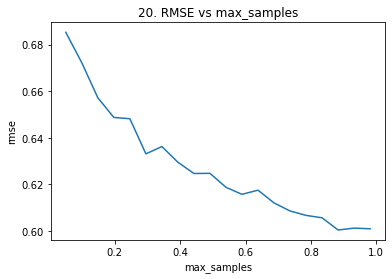

In [23]:
# Creating the 20 models
max_samples =  [0.05 + i*0.049 for i in range(20)]
models_max_samples = [RandomForestRegressor(max_samples = max_samples[i], random_state = iRandomState) for i in range(20)]

max_samples_rmses = []
best_rmse = 1.00
# Fitting the models and making predictions
for model in models_max_samples:                   
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = get_rmse(y_test, predictions)
    if rmse < best_rmse - 0.0005:
        best_rmse = rmse
        best_max_samples  = model.max_samples
        print (f'rmse: {rmse:.5f}  best rmse:{best_rmse}   estimator: {best_max_samples}')
    max_samples_rmses += [rmse]
    print(f"RMSE of model with max_samples={model.max_samples}: {rmse:.5f}")

# Plotting the RMSEs
plt.plot(max_samples, max_samples_rmses)
plt.title("20. RMSE vs max_samples")
plt.xlabel("max_samples")
plt.ylabel("rmse")
plt.show()

### Build a model from best results above

In [24]:
### Print the autogenerated hyperparameters
print(f"Best n_estimators: {best_n_estimators}\nBest max_depth: {best_max_depth}\nBest min_samples_split: {best_min_samples_split}\nBest max_leaf_nodes: {best_max_leaf_nodes}\nBest min_samples_leaf: {best_min_samples_leaf}\nBest max_samples: {best_max_samples}")

Best n_estimators: 450
Best max_depth: 20
Best min_samples_split: 2
Best max_leaf_nodes: 1000
Best min_samples_leaf: 1
Best max_samples: 0.8830000000000001


### instantiate best_model_1

In [25]:
best_model_1 = RandomForestRegressor(max_depth= best_max_depth,
 max_leaf_nodes= best_max_leaf_nodes,
 max_samples= best_max_samples,
 min_samples_leaf= best_min_samples_leaf,
 min_samples_split= best_min_samples_split,
 n_estimators= best_n_estimators,
 random_state= iRandomState)

### train the model

In [26]:
best_model_1.fit(X_train, y_train)
best_predictions = best_model_1.predict(X_test)
best_rmse_model1 = get_rmse(y_test, best_predictions)
print(f"RMSE of the optimized model according to our manual check: {best_rmse_model1:.5f}")

RMSE of the optimized model according to our manual check: 0.59982


### Accuracy check

In [27]:
accuracy_1 = best_model_1.score(X_train, y_train)
accuracy_test_1 = best_model_1.score(X_test, best_predictions)

print('Accuracy for Random Forest using the train set',100*accuracy_1)
print('Accuracy for Random Forest using the test set',100*accuracy_test_1)

Accuracy for Random Forest using the train set 91.31588114185027
Accuracy for Random Forest using the test set 100.0


### Model 2 instnatiation

In [28]:
best_model_2 = RandomForestRegressor(max_depth= 40,
 max_leaf_nodes= 1000,
 max_samples= 0.9810000000000001,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 450,
 random_state= iRandomState)

### Model training and testing

In [29]:
best_model_2.fit(X_train, y_train)
best_predictions = best_model_2.predict(X_test)
best_rmse_model2 = get_rmse(y_test, best_predictions)
print(f"RMSE of the optimized model according to our manual check: {best_rmse_model2:.5f}")

RMSE of the optimized model according to our manual check: 0.59689


### Accuracy Check

In [30]:
accuracy_2 = best_model_2.score(X_train, y_train)
accuracy_test_2 = best_model_2.score(X_test, best_predictions)

print('Accuracy for Random Forest using the train set',100*accuracy_2)
print('Accuracy for Random Forest using the test set',100*accuracy_test_2)

Accuracy for Random Forest using the train set 93.00380185189394
Accuracy for Random Forest using the test set 100.0


### Developing & Training an optimized model using GridSearchCV

In [31]:
# Defining the optional values for each parameter
param_grid = {'n_estimators': [100, 300, 500],
              'max_depth': [20, 30, 40],
              'min_samples_split': [2, 500, 1000],
              'max_leaf_nodes': [333, 666, 1000],
              'min_samples_leaf': [1, 50, 100],
              'max_samples': [0.33,0.66,0.9810000000000001]}

# Using the GridSearchCV algorithm
best_model_3 = model_selection.GridSearchCV(estimator = RandomForestRegressor(),
                                          param_grid = param_grid,
                                          scoring = 'neg_root_mean_squared_error',
                                          verbose=0,
                                          n_jobs=-1,
                                          cv=5)

best_model_3.fit(X_train, y_train)

RMSE of the optimized model according to GridSearchCV algorithm: 0.59965


### Extract thet best parameters the algorithm has found

In [39]:
params = best_model_3.get_params()
pprint(params)

{'cv': 5,
 'error_score': nan,
 'estimator': RandomForestRegressor(),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_jobs': -1,
 'param_grid': {'max_depth': [20, 30, 40],
                'max_leaf_nodes': [333, 666, 1000],
                'max_samples': [0.33, 0.66, 0.9810000000000001],
                'min_samples_leaf': [1, 50, 100],
                'min_samples_split': [2, 500, 1000],
                'n_estimators': [100, 3

### Create optimized models

In [40]:
best_model_3 = RandomForestRegressor(bootstrap= True,
 ccp_alpha= 0.0,
 criterion='mse',
 max_depth=None,
 max_features='auto',
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_impurity_split= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 100,
 n_jobs= None,
 oob_score= False,
 random_state= 42,
 verbose =0,
 warm_start =False)

best_model_3.fit(X_train, y_train)
best_predictions_grid = best_model_3.predict(X_test)
best_rmse_model3 = get_rmse(y_test, best_predictions_grid)
print(f"RMSE of the optimized model according to GridSearchCV algorithm: {best_rmse_model3:.5f}")

RMSE of the optimized model according to GridSearchCV algorithm: 0.60108


### Accuracy check

In [41]:
accuracy_3 = best_model_3.score(X_train, y_train)
accuracy_test_3 = best_model_3.score(X_test, best_predictions)

print('Model_3 Accuracy for Random Forest using the train set',100*accuracy_3)
print('Model_3 Accuracy for Random Forest using the test set',100*accuracy_test_3)

Model_3 Accuracy for Random Forest using the train set 93.22544118523112
Model_3 Accuracy for Random Forest using the test set 98.33093972605914


### Evaluation of results

In [42]:
accuracy_model_1 = accuracy_1 * 100
accuracy_model_2 = accuracy_2 * 100
accuracy_model_3 = accuracy_3 * 100

print(f'Model_1 Accuracy according to RMSE for Random Forest auto set: {accuracy_model_1:.5f}')
print(f'Model_2 Accuracy according to RMSE for Random Forest Manually set: {accuracy_model_2:.5f}')
print(f'Model_3 Accuracy according to RMSE for Random Forest using GridSearchCV: {accuracy_model_3:.5f}')


Model_1 Accuracy according to RMSE for Random Forest auto set: 91.31588
Model_2 Accuracy according to RMSE for Random Forest Manually set: 93.00380
Model_3 Accuracy according to RMSE for Random Forest using GridSearchCV: 93.22544


In [48]:
y_pred1 = best_model_1.predict(X_test)
y_pred2 = best_model_2.predict(X_test)
y_pred3 = best_model_3.predict(X_test)
model = best_model_3

In [49]:
# Open a file and use dump()
with open('file_HW3_mdl1.pkl','wb') as file:
    #create a new file 
    pickle.dump(best_model_1,file)
    
# Open a file and use dump()
with open('file_HW3_mdl2.pkl','wb') as file:
    #create a new file 
    pickle.dump(best_model_2,file)
    
# Open a file and use dump()
with open('file_HW3_mdl3.pkl','wb') as file:
    #create a new file 
    pickle.dump(best_model_3,file)
    


In [47]:
model.predict(np.array([[7.9, 0.32, 0.51, 1.8, 0.341, 17, 0.9969, 3.04 , 1.08, 9.2]]))

array([5.35])